# Pearsons correlation coefficient

is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation

# $ \rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} $

expanded to...

# $ r =\frac{\sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{y})^2}} $



In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/2SCg8Kuh0tE" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>')

# Pearsons correlation coefficient

##### scipy.stats.pearsonr(x, y)

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

- Parameters:	
    - x : (N,) array_like
        - Input
    - y : (N,) array_like
        - Input

- Returns:	
    - (Pearson’s correlation coefficient, 2-tailed p-value)

# Cross Correlation

-1 to 1

# $ corr(x, y) = \sum_{n=0}^{n-1} x[n]*y[n] $

# Normalized Cross-Correlation

The normalized cross-correlation can detect the correlation of two signals with different power.

It takes the cross correlation equation and scales the function by the energy of the two signals in the denominator.

# $ norm\_corr(x,y)=\dfrac{\sum_{n=0}^{n-1} x[n]*y[n]}{\sqrt{\sum_{n=0}^{n-1} x[n]^2 * \sum_{n=0}^{n-1} y[n]^2}} $

In [2]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ngEC3sXeUb4" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>')

# Normalised Cross-Correlation in Scipy

##### scipy.signal.correlate(in1, in2, mode='full', method='auto')

Cross-correlate two N-dimensional arrays.

Cross-correlate in1 and in2, with the output size determined by the mode argument.

- Parameters:	
    - in1 : array_like
        - First input.
    - in2 : array_like
        - Second input. Should have the same number of dimensions as in1.
    - mode : str {‘full’, ‘valid’, ‘same’}, optional
        - A string indicating the size of the output:
            - full
                - The output is the full discrete linear cross-correlation of the inputs. (Default)
            - valid
                - The output consists only of those elements that do not rely on the zero-padding. In ‘valid’ mode, either in1 or in2 must be at least as large as the other in every dimension.
            - same
                - The output is the same size as in1, centered with respect to the ‘full’ output.
    - method : str {‘auto’, ‘direct’, ‘fft’}, optional
        - A string indicating which method to use to calculate the correlation.
            - direct
                - The correlation is determined directly from sums, the definition of correlation.
            - fft
                - The Fast Fourier Transform is used to perform the correlation more quickly (only available for numerical arrays.)
            - auto
                - Automatically chooses direct or Fourier method based on an estimate of which is faster (default). See convolve Notes for more detail.
- Returns:	
    - correlate : array
        - An N-dimensional array containing a subset of the discrete linear cross-correlation of in1 with in2.

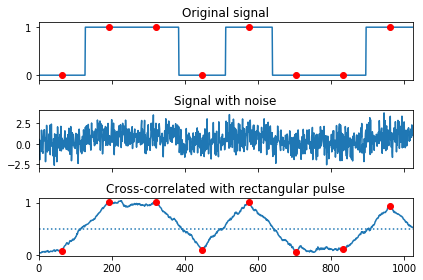

In [4]:
import numpy as np
from scipy import signal
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

import matplotlib
import matplotlib.pyplot as plt
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

# Discrete Fourier Transform



In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/mkGsMWi_j4Q" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>')

# Discrete Fourier Transform in Scipy

##### numpy.fft.fft(a, n=None, axis=-1, norm=None)

Compute the one-dimensional discrete Fourier Transform.

This function computes the one-dimensional n-point discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT) algorithm

- Parameters:	
    - a : array_like
        - Input array, can be complex.
    - n : int, optional
        - Length of the transformed axis of the output. If n is smaller than the length of the input, the input is cropped. If it is larger, the input is padded with zeros. If n is not given, the length of the input along the axis specified by axis is used.
    - axis : int, optional
        - Axis over which to compute the FFT. If not given, the last axis is used.
    - norm : {None, “ortho”}, optional
        - Normalization mode (see numpy.fft). Default is None.

- Returns:	
    - out : complex ndarray
        - The truncated or zero-padded input, transformed along the axis indicated by axis, or the last one if axis is not specified.
- Raises:	
    - IndexError
        - if axes is larger than the last axis of a.

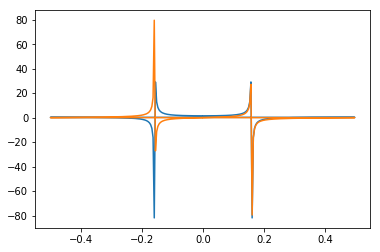

In [5]:
import numpy as np

np.fft.fft(np.exp(2j * np.pi * np.arange(8) / 8))

import matplotlib.pyplot as plt
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()